In [18]:
import pandas as pd
from glob import glob
import sys
import os
import matplotlib.pyplot as plt
import xarray as xr

project_root = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
sys.path.append(project_root)

from utils.functions import filter_similar_atmospheric_conditions

In [6]:


all_files = glob("../unprocessed_data/*parquet")

s1a2020 = pd.read_parquet(all_files[0])
s1a2021 = pd.read_parquet(all_files[1])
s1b2020 = pd.read_parquet(all_files[2])
s1b2021 = pd.read_parquet(all_files[3])

print(len(s1a2020), len(s1a2021), len(s1b2020), len(s1b2021))

720678 685889 736103 709018


In [12]:
with pd.option_context('display.float_format', lambda x: f'{x:.5f}' if abs(x) < 1e5 else f'{x:.5e}'):
    print(s1a2020.L.describe().astype(float))
    print("======"*5)
    print(s1a2021.L.describe().astype(float))
    print("======"*5)
    print(s1b2020.L.describe().astype(float))
    print("======"*5)
    print(s1b2021.L.describe().astype(float))
    print("======"*5)


count    6.99328e+05
mean       -26.89543
std      24904.05805
min     -5.92392e+06
25%       -129.57580
50%        -46.34303
75%         -9.81738
max      7.83902e+06
Name: L, dtype: float64
count    6.85025e+05
mean      -100.71664
std      1.19533e+05
min     -9.06364e+07
25%       -129.00951
50%        -46.44889
75%        -10.20281
max      2.05725e+07
Name: L, dtype: float64
count    7.29712e+05
mean      -252.42930
std      1.75797e+05
min     -1.48105e+08
25%       -127.20981
50%        -44.47212
75%         -9.31921
max      9.42810e+06
Name: L, dtype: float64
count    7.03211e+05
mean       914.49492
std      7.00204e+05
min     -7.69041e+07
25%       -125.83265
50%        -44.50594
75%         -9.48480
max      5.63873e+08
Name: L, dtype: float64


In [13]:
def remove_sea_ice(df):
    df = df[df["class_1"] != "SI"]
    df = df[df["class_2"] != "SI"]
    df = df[df["class_3"] != "SI"]

    return df

s1a2020 = remove_sea_ice(s1a2020)
s1a2021 = remove_sea_ice(s1a2021)
s1b2020 = remove_sea_ice(s1b2020)
s1b2021 = remove_sea_ice(s1b2021)





In [14]:
wspd_bin = (3, 15)
L_bin = (-10e9, -0.1)

s1a2020_unstable = filter_similar_atmospheric_conditions(s1a2020, wspd_range=wspd_bin, L_range=L_bin)
s1a2021_unstable = filter_similar_atmospheric_conditions(s1a2021, wspd_range=wspd_bin, L_range=L_bin)

s1b2020_unstable = filter_similar_atmospheric_conditions(s1b2020, wspd_range=wspd_bin, L_range=L_bin)
s1b2021_unstable = filter_similar_atmospheric_conditions(s1b2021, wspd_range=wspd_bin, L_range=L_bin)

print(len(s1a2020_unstable) + len(s1a2021_unstable) + len(s1b2020_unstable) + len(s1b2021_unstable))


2006967


In [16]:
L_bin = (0.1, 10e9)

s1a2020_stable = filter_similar_atmospheric_conditions(s1a2020, wspd_range=wspd_bin, L_range=L_bin)
s1a2021_stable = filter_similar_atmospheric_conditions(s1a2021, wspd_range=wspd_bin, L_range=L_bin)
s1b2020_stable = filter_similar_atmospheric_conditions(s1b2020, wspd_range=wspd_bin, L_range=L_bin)
s1b2021_stable = filter_similar_atmospheric_conditions(s1b2021, wspd_range=wspd_bin, L_range=L_bin)

print(len(s1a2020_stable) + len(s1a2021_stable) + len(s1b2020_stable) + len(s1b2021_stable))


362455


In [38]:
def plot_comparative_boxplots(dfs, stable, cols_to_plot):
    """
    Plot boxplots for selected columns across 4 DataFrames for comparison.

    Parameters:
    - dfs: list of 4 DataFrames
    - stable: bool, whether the data is stable (used in title)
    - cols_to_plot: list of column names to plot
    """
    fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(6 * len(cols_to_plot), 6), sharey=False)
    if len(cols_to_plot) == 1:
        axes = [axes]

    for ax, col in zip(axes, cols_to_plot):
        data = [df[col].dropna() for df in dfs]
        
        data = [remove_outliers(d) for d in data]
        for d in data:
            print(col, len(d))

        ax.boxplot(data, tick_labels=[f'DF{i+1}' for i in range(4)])
        ax.set_title(col)
        ax.grid(True)

    state = 'Stable' if stable else 'Unstable'
    fig.suptitle(f'{state} - Comparative Boxplots', fontsize=16)
    plt.tight_layout()
    plt.show()

def remove_outliers(series):
    """
    Remove outliers from a Series using the IQR method.

    Parameters:
    - series: pd.Series

    Returns:
    - pd.Series without outliers
    """
    q1 = series.quantile(0.05)
    q3 = series.quantile(0.95)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return series[(series >= lower) & (series <= upper)]



wspd 92082
wspd 87003
wspd 94548
wspd 88822
L 90226
L 85281
L 92668
L 87029
airt 92082
airt 87003
airt 94548
airt 88822
sst 92082
sst 87003
sst 94548
sst 88822


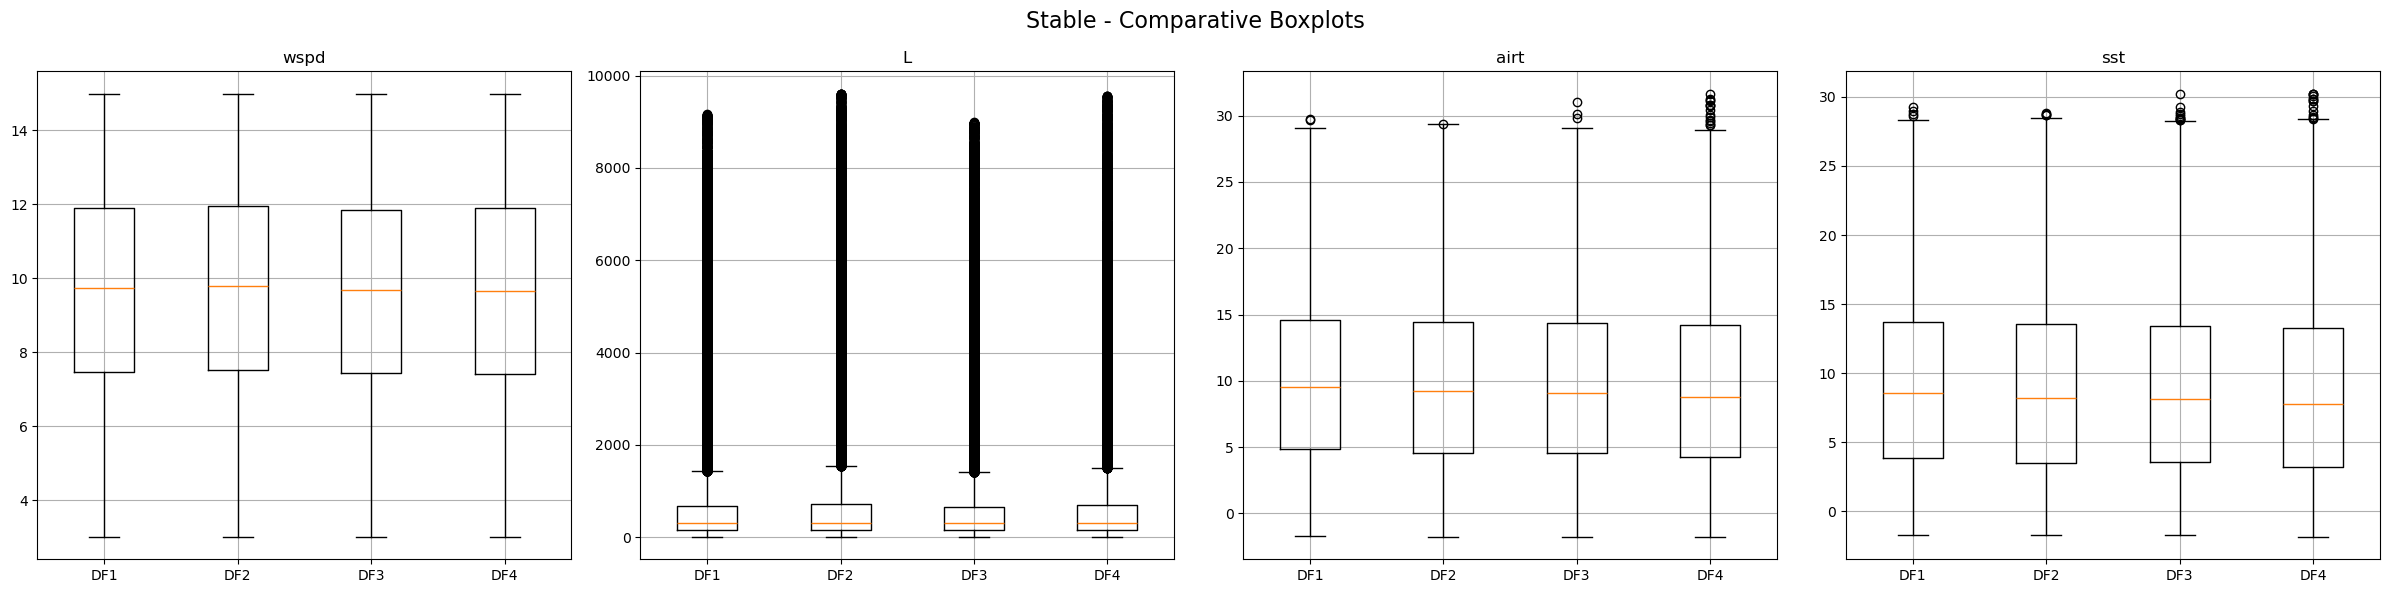

In [46]:
plot_comparative_boxplots([s1a2020_stable, s1a2021_stable, s1b2020_stable, s1b2021_stable], stable=True, cols_to_plot=['wspd', 'L', 'airt', 'sst'])

wspd 502005
wspd 491011
wspd 517570
wspd 496381
L 492124
L 481254
L 507433
L 486538
airt 502005
airt 491011
airt 517570
airt 496381
sst 502005
sst 491011
sst 517570
sst 496381


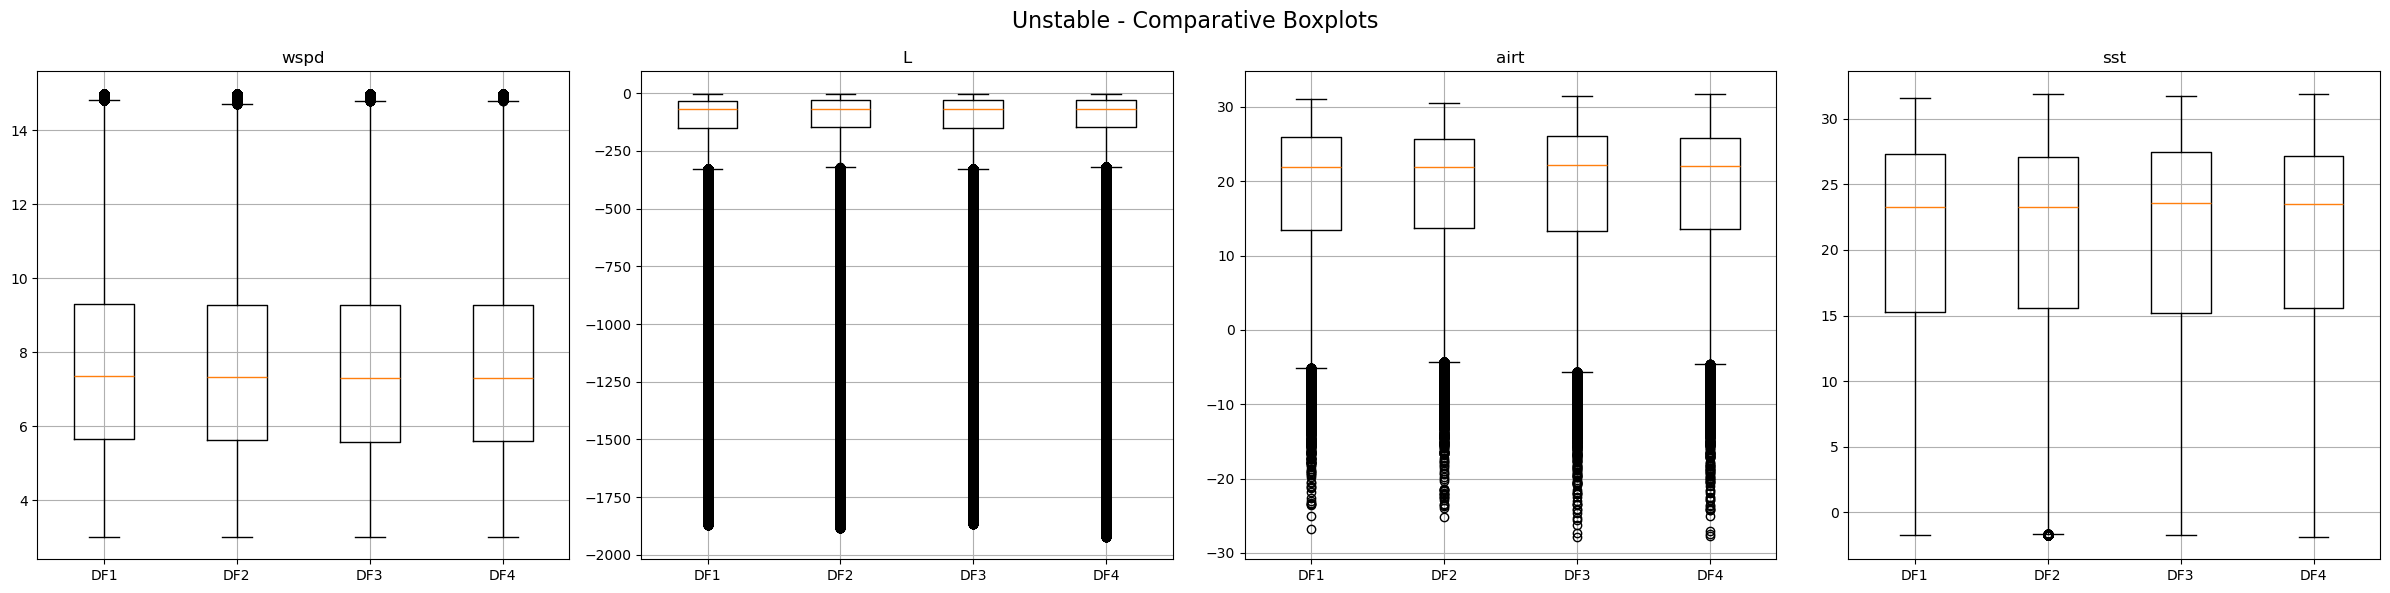

In [45]:
plot_comparative_boxplots([s1a2020_unstable, s1a2021_unstable, s1b2020_unstable, s1b2021_unstable], stable=False, cols_to_plot=['wspd', 'L', 'airt', 'sst'])

In [42]:
s1a2020.columns

Index(['value', 'wm_type', 'lonlat_center', 'tif_path', 'process_status',
       'class_1', 'prob_1', 'class_2', 'prob_2', 'class_3', 'prob_3',
       'all_prob', 'processing_time', 'filename', 'date_time', 'latitude',
       'longitude', 'L', 'wspd', 'wdir', 'sst', 'airt', 'p', 'rh', 'blh',
       'msdwswrf', 'msdwlwrf'],
      dtype='object')